### 1.数据集:心脏病

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
sns.set(style='whitegrid',palette="turbo")
plt.rcParams['font.family']='Arial Unicode MS'
plt.rcParams['axes.unicode_minus']=False

In [14]:
import os
print(os.listdir())

['demo.toc', 'demo.tex', '.DS_Store', 'demo.out', 'heart.csv', 'demo09.png', 'demo08.png', 'demo.pdf', 'ruc.jpg', 'demo06.png', 'demo12.png', 'demo13.png', 'demo07.png', 'demo11.png', 'demo05.png', 'demo04.png', 'demo10.png', '1.ipynb', 'demo14.png', '编程基础大作业.ipynb', 'tree.png', 'demo.aux', 'demo01.png', 'demo15.png', 'demo.synctex.gz', 'demo.log', 'demo03.png', 'demo02.png', '3.ipynb', '.ipynb_checkpoints', 'heartDiseaseAndAges.png', '4.ipynb', '2.ipynb', 'tree.dot']


### 2.探索性分析

In [15]:
data = pd.read_csv("./heart.csv")

In [16]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
data.shape

(303, 14)

In [18]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
countfemale = len(data[data.sex == 0])
countmale = len(data[data.sex == 1])
print(f'没患病人数:{countNoDisease }',end=' ,')
print("没有得心脏病比率: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print(f'有患病人数:{countHaveDisease }',end=' ,')
print("患有心脏病比率: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))
print(f'女性人数:{countfemale }',end=' ,')
print("女性比例: {:.2f}%".format((countfemale / (len(data.sex))*100)))
print(f'男性人数:{countmale }',end=' ,')
print("男性比例: {:.2f}%".format((countmale   / (len(data.sex))*100)))

没患病人数:138 ,没有得心脏病比率: 45.54%
有患病人数:165 ,患有心脏病比率: 54.46%
女性人数:96 ,女性比例: 31.68%
男性人数:207 ,男性比例: 68.32%


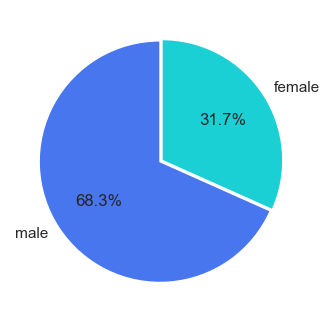

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

li_1=['male','female']
li_2=[207,96]
explode = (0.01, 0.01)  

fig,ax=plt.subplots(ncols=1,nrows=1,figsize=(8, 4),dpi=100)
plt.pie(li_2, explode=explode,autopct = '%.1f%%',labels=li_1,shadow=False, startangle=90)
plt.show()

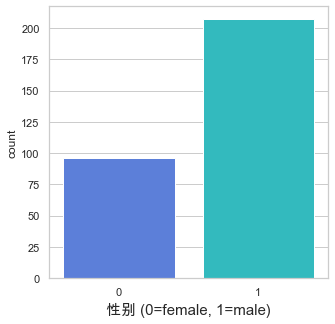

In [11]:
fig, ax =plt.subplots(1,1)
fig.set_size_inches(w=5,h=5)
sns.countplot(x="sex", data=data)
plt.xlabel("性别 (0=female, 1=male)",fontsize=15)
# plt.xticks(fontsize=20)
# plt.savefig('demo02.png')
plt.show()

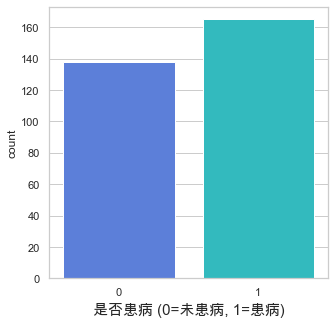

In [12]:
fig, ax =plt.subplots(1,1)
fig.set_size_inches(w=5,h=5)
sns.countplot(x="target", data=data)
plt.xlabel("是否患病 (0=未患病, 1=患病)",fontsize=15)
# plt.savefig('demo03.png')
plt.show()

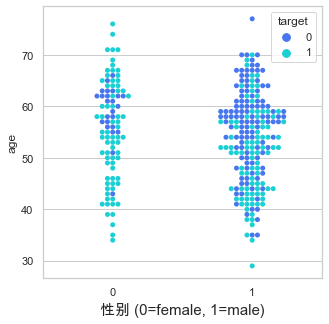

In [13]:
fig, ax =plt.subplots(1,1)
fig.set_size_inches(w=5,h=5)
sns.swarmplot(x='sex',y='age',hue='target',data=data)
plt.xlabel("性别 (0=female, 1=male)",fontsize=15)
# plt.savefig('demo04.png')
plt.show()

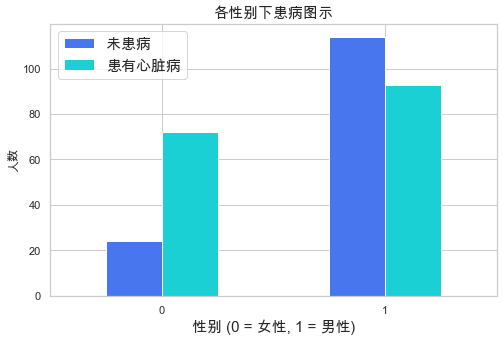

In [14]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(8,5))
plt.title('各性别下患病图示',fontsize=15)
plt.xlabel('性别 (0 = 女性, 1 = 男性)',fontsize=15)
plt.xticks(rotation=0)
plt.legend(["未患病", "患有心脏病"],fontsize=15)
plt.ylabel('人数')
# plt.savefig('demo05.png')
plt.show()

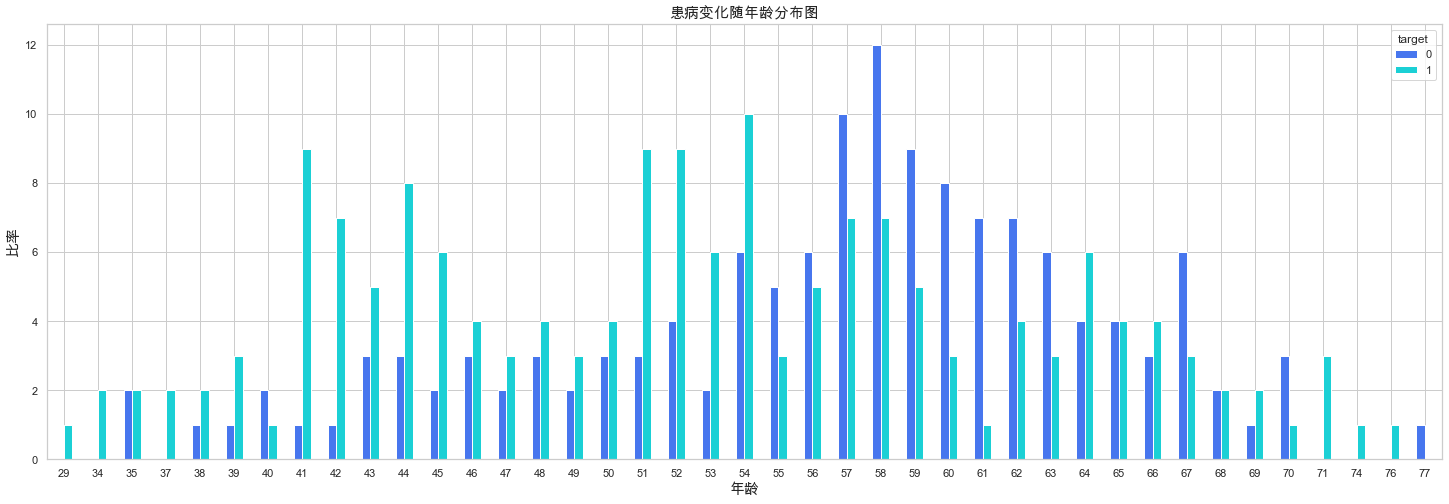

In [15]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(25,8))
plt.title('患病变化随年龄分布图',fontsize=15)
plt.xlabel('年龄',fontsize=15)
plt.ylabel('比率',fontsize=15)
plt.xticks(rotation = 0)
# plt.savefig('demo06.png')
plt.show()

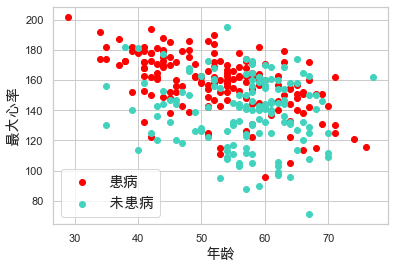

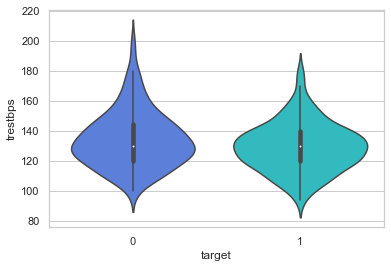

In [16]:
# 散点图
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)], c='#41D3BD')
plt.legend(["患病", "未患病"],fontsize=15)
plt.xlabel("年龄",fontsize=15)
plt.ylabel("最大心率",fontsize=15)
# plt.savefig('demo07.png')
plt.show()
#提琴图
sns.violinplot(x=data.target,y=data.trestbps,data=data)
plt.show()

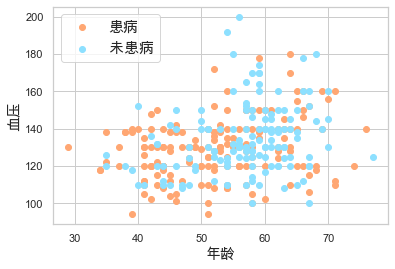

In [17]:
plt.scatter(x=data.age[data.target==1], y=data.trestbps[data.target==1], c="#FFA773")
plt.scatter(x=data.age[data.target==0], y=data.trestbps[data.target==0], c="#8DE0FF")
plt.legend(["患病",'未患病'],fontsize=15)
plt.xlabel("年龄",fontsize=15)
plt.ylabel("血压",fontsize=15)
# plt.savefig('demo08.png')
plt.show()

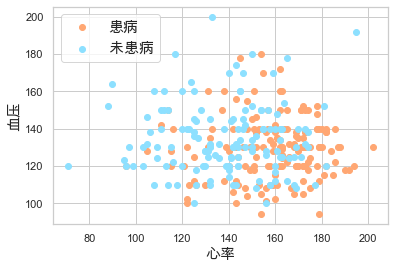

In [18]:
plt.scatter(x=data.thalach[data.target==1], y=data.trestbps[data.target==1], c="#FFA773")
plt.scatter(x=data.thalach[data.target==0], y=data.trestbps[data.target==0], c="#8DE0FF")
plt.legend(["患病",'未患病'],fontsize=15)
plt.xlabel("心率",fontsize=15)
plt.ylabel("血压",fontsize=15)
# plt.savefig('demo09.png')
plt.show()

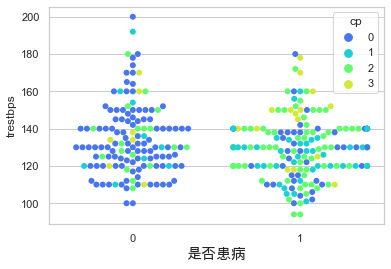

In [19]:
sns.swarmplot(x='target',y='trestbps',hue='cp',data=data, size=6)
plt.xlabel('是否患病',fontsize=15)
# plt.savefig('demo10.png')
plt.show()

Text(0.5, 1.0, '胸痛类型')

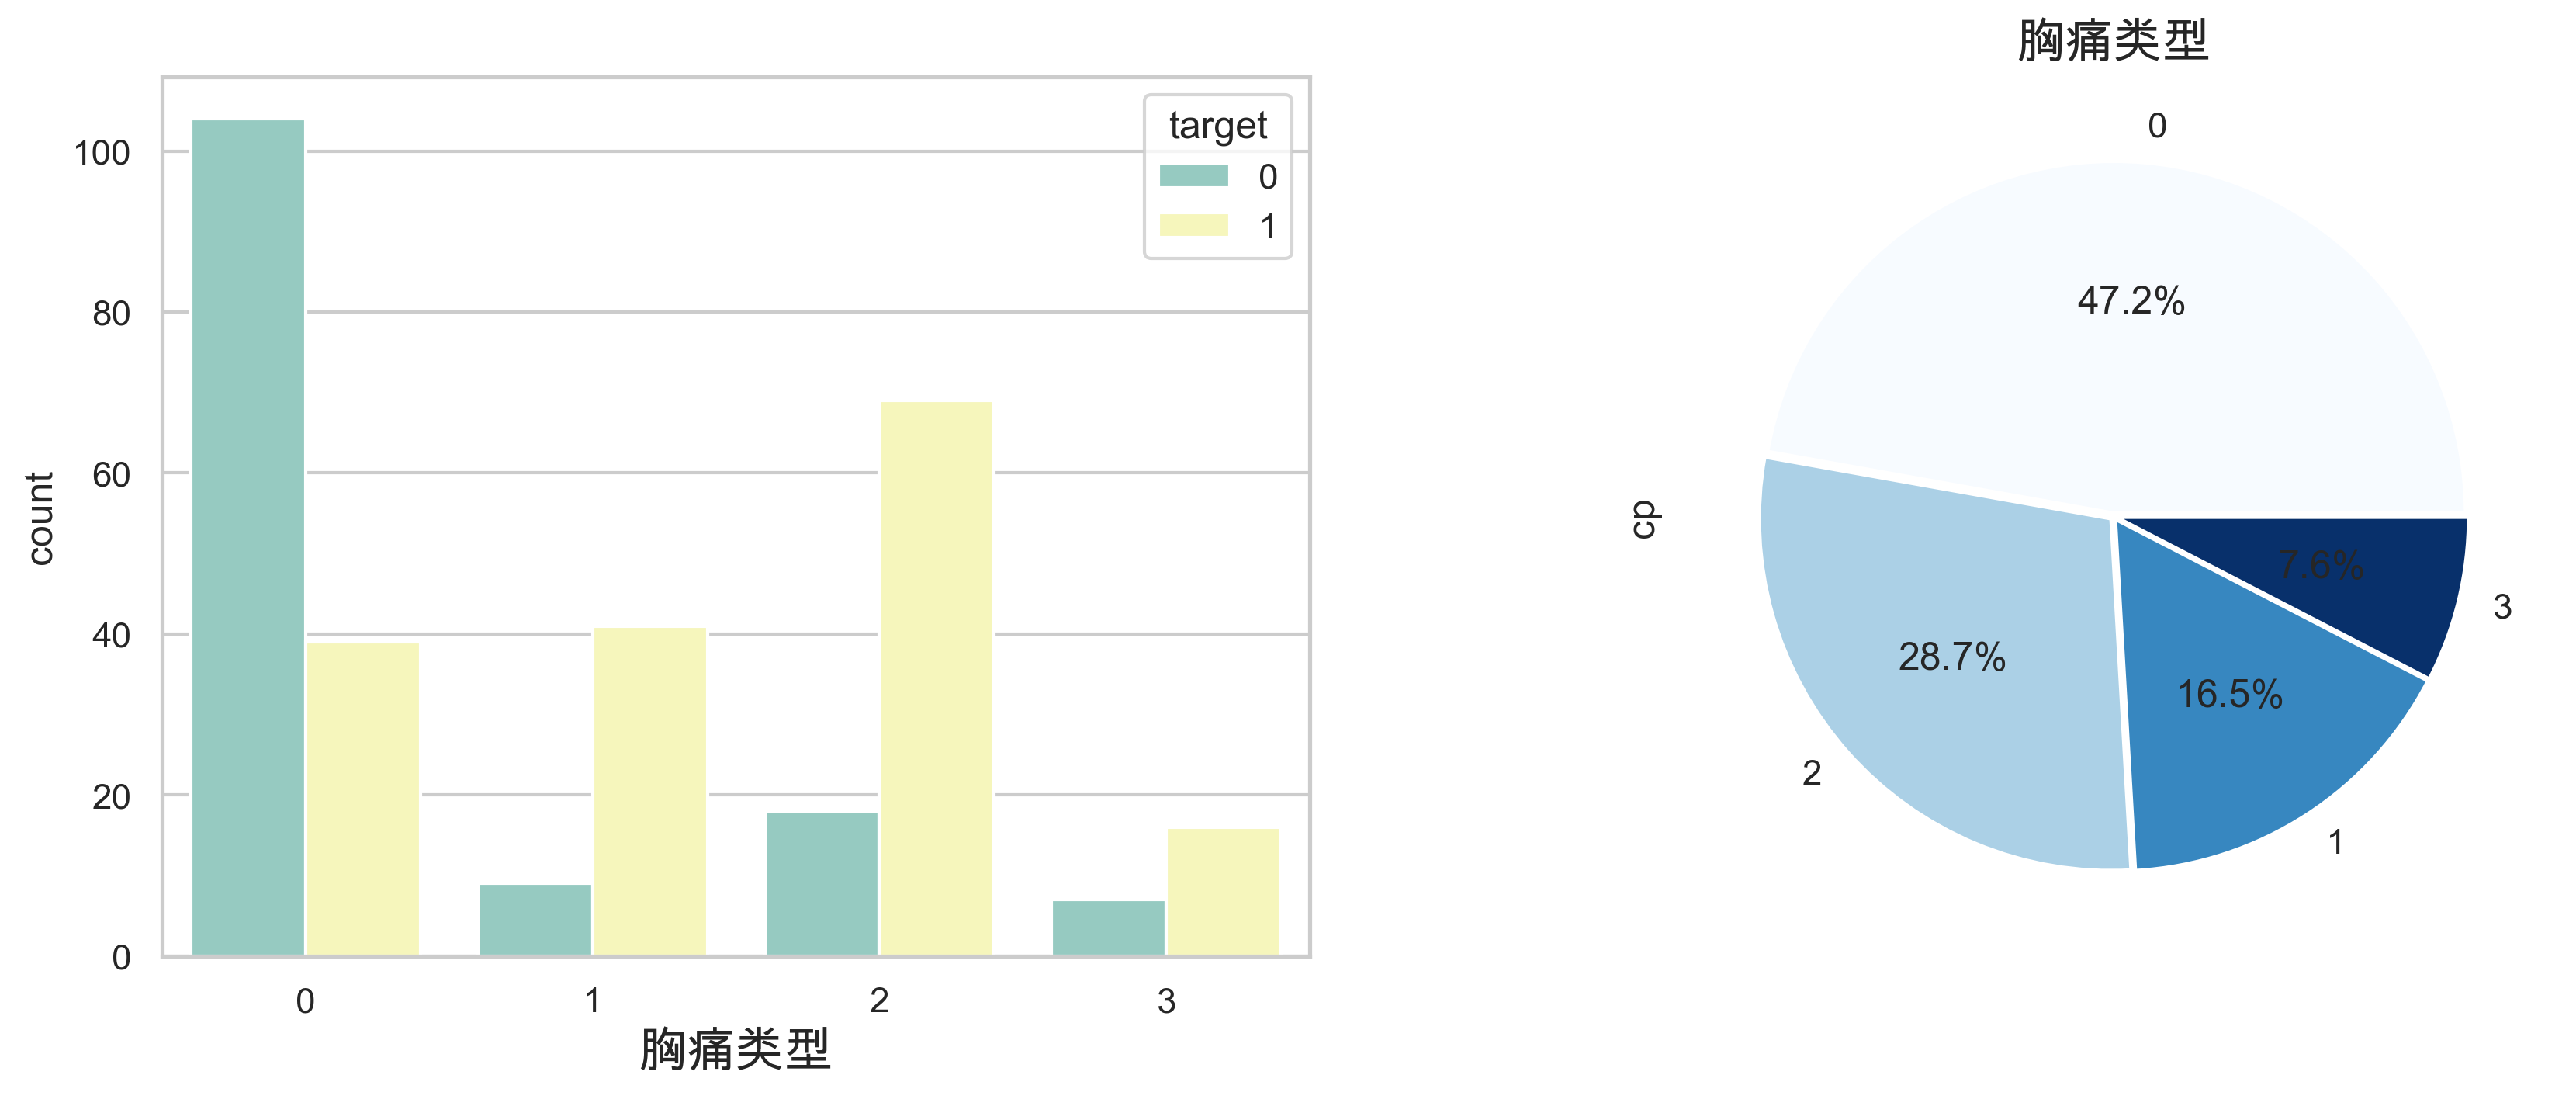

In [20]:
fig,ax=plt.subplots(1,2,figsize=(14,5),dpi=300)
sns.countplot(x='cp',data=data,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("胸痛类型",fontsize=15)
data.cp.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0.01,0.01,0.01,0.01], cmap='Blues')
ax[1].set_title("胸痛类型",fontsize=15)
# plt.savefig('demo12.png')

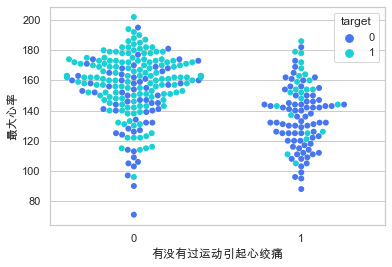

In [21]:
sns.swarmplot(x='exang',y='thalach',hue='target',data=data, size=6)
plt.xlabel('有没有过运动引起心绞痛')
plt.ylabel('最大心率')
plt.show()

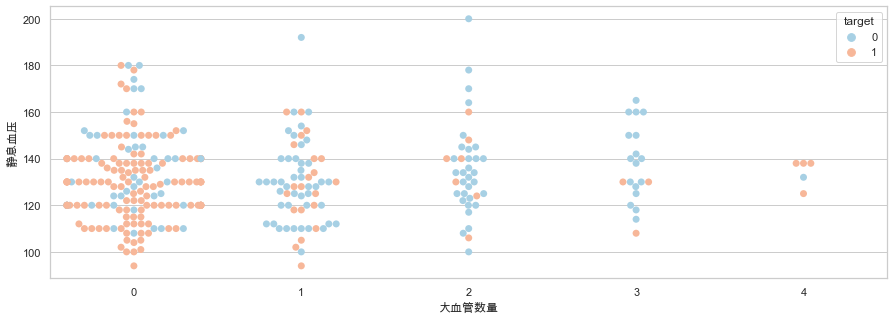

In [22]:
plt.figure(figsize=(15,5))
sns.swarmplot(y='trestbps',data=data,x='ca',hue='target',palette='RdBu_r',size=7)
plt.xlabel('大血管数量')
plt.ylabel('静息血压')
plt.show()

Text(29.146846527777782, 0.5, '年龄')

<Figure size 1080x360 with 0 Axes>

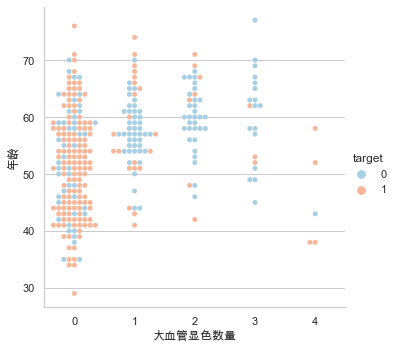

In [23]:
plt.figure(figsize=(15,5))
sns.catplot(x="ca", y="age", hue="target", kind="swarm", data=data, palette='RdBu_r')
plt.xlabel('大血管显色数量')
plt.ylabel('年龄')

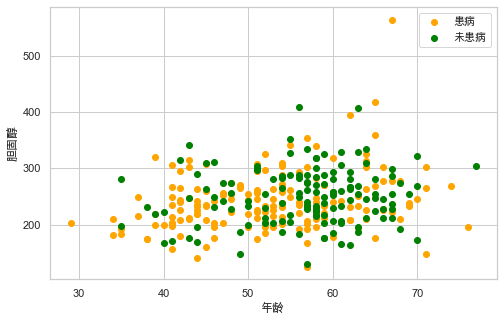

<AxesSubplot:xlabel='target', ylabel='chol'>

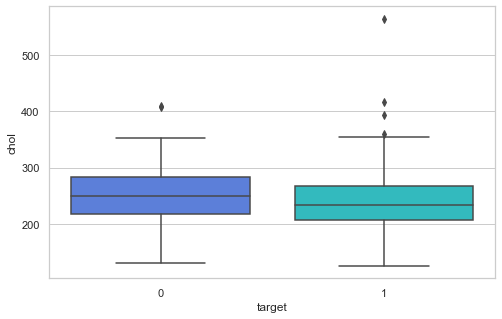

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(x=data.age[data.target==1], y=data.chol[data.target==1], c="orange")
plt.scatter(x=data.age[data.target==0], y=data.chol[data.target==0], c="green")
plt.legend(["患病",'未患病'])
plt.xlabel("年龄")
plt.ylabel("胆固醇")
plt.show()
# 箱型图
plt.figure(figsize=(8,5))
sns.boxplot(x=data.target,y=data.chol,data=data)

(14.5, -0.5)

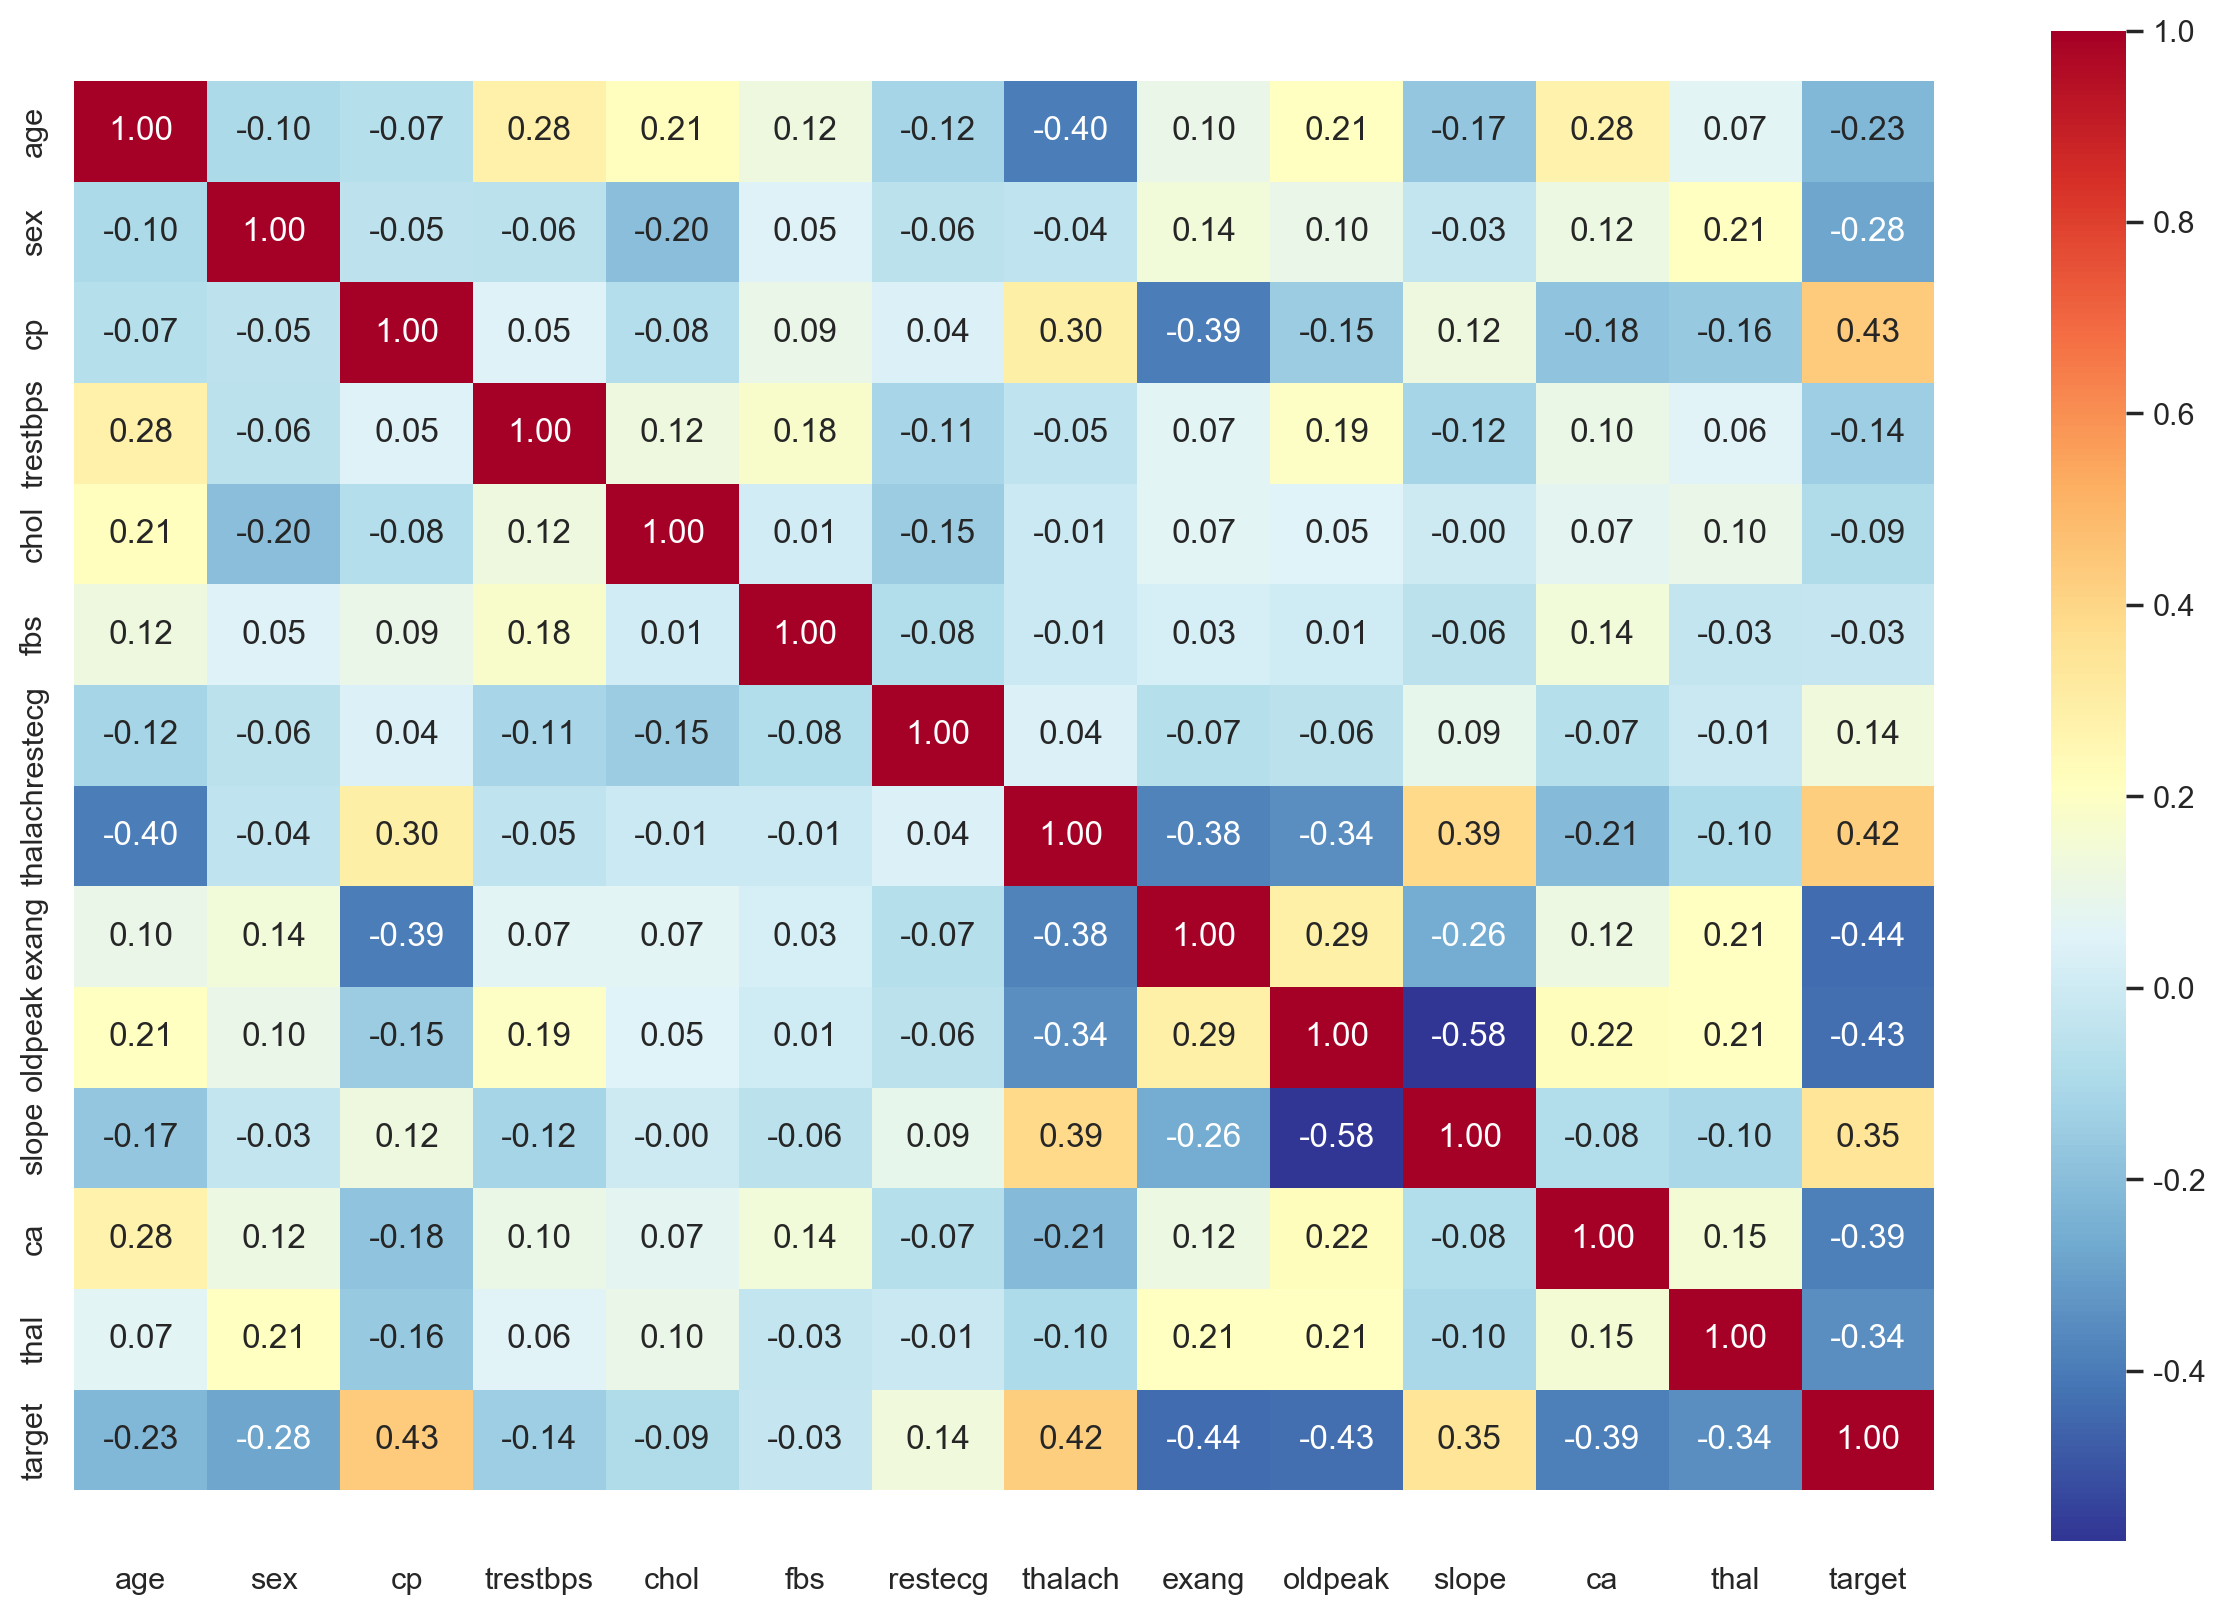

In [25]:
plt.figure(figsize=(15,10),dpi=200)
ax= sns.heatmap(data.corr(),cmap=plt.cm.RdYlBu_r , annot=True ,fmt='.2f')
a,b =ax.get_ylim()
ax.set_ylim(a+0.5,b-0.5)
# plt.savefig('demo11.png')

### 3.分类变量与连续变量

In [24]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [25]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [26]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [27]:
import hvplot.pandas

In [28]:
have_disease = data.loc[data['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'sex'].value_counts().hvplot.bar(alpha=0.4) 

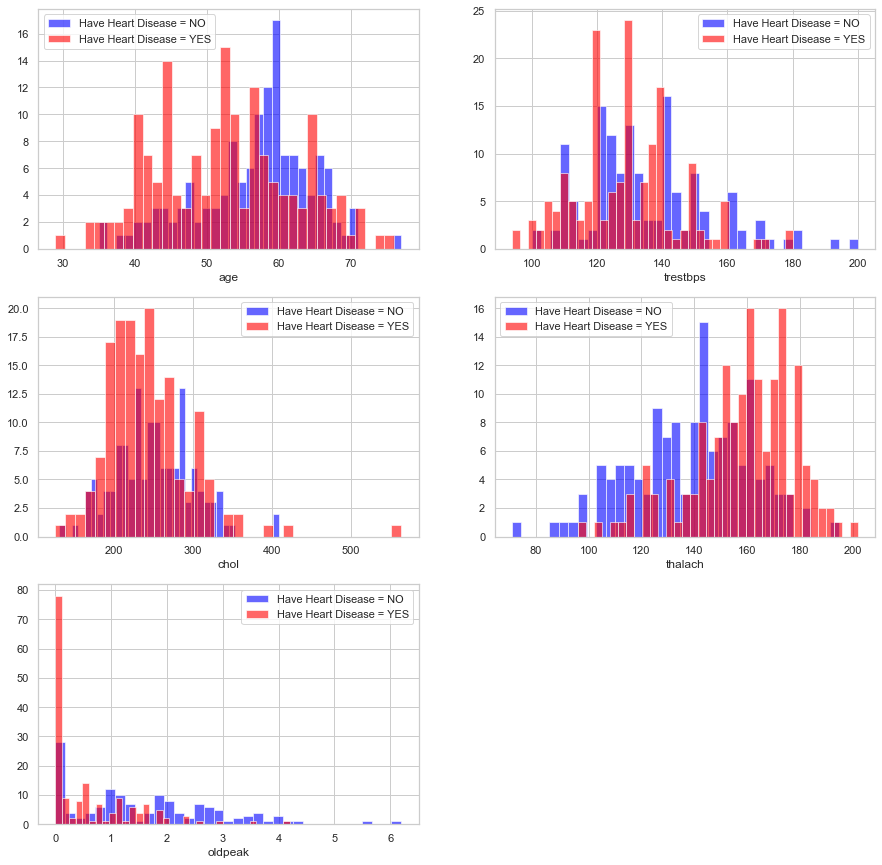

In [29]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

# plt.savefig('demo13.png')

In [30]:
categorical_val.remove('target')
dataset = pd.get_dummies(data, columns = categorical_val)

In [31]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [32]:
print(data.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [47]:
##标准化
s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [34]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


### 4.定义类，比较不同的方法的二分类效果

In [35]:
class final_project():
    def __init__(self, data):
        if not isinstance(data,pd.DataFrame):
            raise TypeError('TypeError')
            
    def label_encode_cat_features(self, data, cat_features):
        label_encoder = LabelEncoder()
        data_encoded = data.copy()
        for col in cat_features:
            data_encoded[col] = label_encoder.fit_transform(data[col])
        data = data_encoded
        return data


    def score_summary(self, names, classifiers):
        cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
        data_table = pd.DataFrame(columns=cols)
        for name, clf in zip(names, classifiers):        
            clf.fit(X_train, y_train)

            pred = clf.predict(X_val)
            accuracy = accuracy_score(y_val, pred)

            pred_proba = clf.predict_proba(X_val)[:, 1]

            fpr, tpr, thresholds = roc_curve(y_val, pred_proba)        
            roc_auc = auc(fpr, tpr)

            # confusion matric, cm
            cm = confusion_matrix(y_val, pred) 

            # recall: TP/(TP+FN)
            recall = cm[1,1]/(cm[1,1] +cm[1,0])

            # precision: TP/(TP+FP)
            precision = cm[1,1]/(cm[1,1] +cm[0,1])

            # F1 score: TP/(TP+FP)
            f1 = 2*recall*precision/(recall + precision)

            df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
            data_table = data_table.append(df)     

        return(np.round(data_table.reset_index(drop=True), 2))


    def plot_conf_matrix(self, names, classifiers, nrows, ncols, fig_a, fig_b):
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))
        i = 0
        for clf, ax in zip(classifiers, axes.flatten()):
            clf.fit(X_train, y_train)
            plot_confusion_matrix(clf, X_val, y_val, ax=ax)
            ax.title.set_text(names[i])
            i = i + 1       
        plt.tight_layout() 
        plt.show()


    def roc_auc_curve(self, names, classifiers):
        plt.figure(figsize=(12, 8))   

        for name, clf in zip(names, classifiers):
            clf.fit(X_train, y_train)

            pred_proba = clf.predict_proba(X_val)[:, 1]

            fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
            roc_auc = auc(fpr, tpr)

            plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
            plt.plot([0, 1], [0, 1], color='darkseagreen', lw=1, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.0])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic (ROC) curves', fontsize=20)
            plt.legend(loc="lower right")

In [43]:
seed = 0

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


names = ['Logistic Regression',
         'Nearest Neighbors',
         'Support Vectors',
         'Decision Tree',
         'Random Forest']

classifiers = [ LogisticRegression(solver="liblinear", random_state=seed),
                KNeighborsClassifier(2),
                SVC(probability=True, random_state=seed),
                DecisionTreeClassifier(random_state=seed),
                RandomForestClassifier(random_state=seed)]

In [44]:
test = final_project(dataset)

#### 各项得分比较

In [40]:
test.score_summary(names, classifiers).sort_values(by='Accuracy' , ascending = False)

,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
2,Support Vectors,90.16,0.93,0.88,0.93,0.90
0,Logistic Regression,88.52,0.95,0.88,0.90,0.89
4,Random Forest,86.89,0.93,0.88,0.88,0.88
1,Nearest Neighbors,81.97,0.93,0.69,0.96,0.80
3,Decision Tree,81.97,0.82,0.78,0.86,0.82


#### ROC曲线

<Figure size 1800x1200 with 0 Axes>

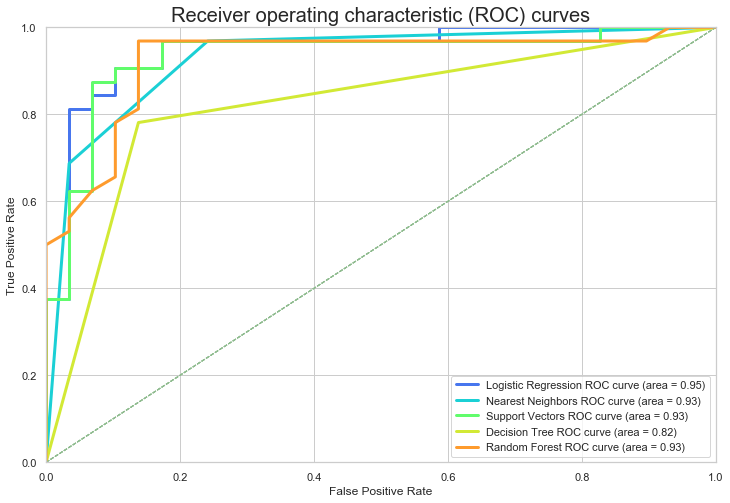

In [46]:
plt.figure(dpi=300)
test.roc_auc_curve(names, classifiers)
# plt.savefig('demo14.png')

#### 混淆矩阵

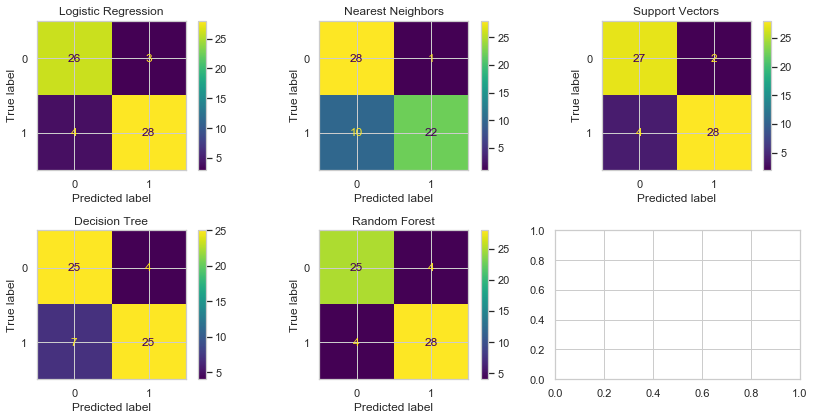

In [42]:
test.plot_conf_matrix(names, classifiers, nrows=2, ncols=3, fig_a=12, fig_b=6)